### Predicting the Stock Market with Machine Learning

> This project walks through a detailed approach to predic stock prices with the __RandomForest__ machine learning algorithm

It uses a supervised learning algorithm aiming to give high certainty predictions whether the stock market will be _bullish_ or _bearish_


### Install yfinance

> yfinance is short for Yahoo finance.

It is a Python library that provides a simple and convenient way to access Yahoo Finance market data. It allows you to download financial data such as stock prices, historical data, and company information using Python.

In [137]:
# installing dependencies - the yfinance library
!pip install yfinance

In [138]:
# import the module 
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### Choose the stock to analyse

We can select any publicly traded stock or asset and pull its historical data using yfinance. 

yfinance gives you access to a variety of assets beyond stocks, including cryptocurrencies, gold, and other precious metals.

> Simply pass in the ticker symbol for the asset you'd like to work with to create a __Ticker__ object

In [139]:
# analysis on the S&P 500 index

ticker_symbol = "^GSPC"

# create the Ticker object

sp500 = yf.Ticker(ticker_symbol)

In [140]:
# load the entire trading data available for the S&P500 index
sp500 = sp500.history(period='max')

In [141]:
sp500.head()  #preview the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


<Figure size 900x900 with 0 Axes>

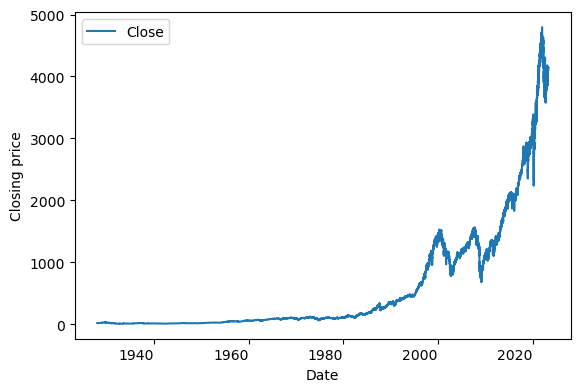

In [142]:
# plot the trend showing the closing prices over time

plt.figure(figsize=(9,9))

# use_index specifies that index of sp500 should be used as the x_axis
sp500.plot.line(y='Close', use_index=True) 
plt.ylabel('Closing price')
plt.xticks(rotation=0);

#### Assessing and cleaning the data

It is always important to assess and clean the data as most real life datasets are untidy and messy.

In [143]:
sp500.describe(include='all') #obtain the statistical summary of the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,23941.000000,23941.000000,23941.000000,23941.000000,2.394100e+04,23941.0,23941.0
mean,560.817746,584.379860,577.179041,581.008273,8.660385e+08,0.0,0.0
std,933.339468,927.418845,916.231920,922.180647,1.588938e+09,0.0,0.0
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,9.520000,24.400000,24.400000,24.400000,1.430000e+06,0.0,0.0
50%,40.480000,102.089996,100.489998,101.260002,1.906000e+07,0.0,0.0
75%,953.390015,962.700012,946.429993,954.070007,7.981000e+08,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


In [144]:
sp500.info() #are the datatypes correct

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23941 entries, 1927-12-30 00:00:00-05:00 to 2023-04-21 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23941 non-null  float64
 1   High          23941 non-null  float64
 2   Low           23941 non-null  float64
 3   Close         23941 non-null  float64
 4   Volume        23941 non-null  int64  
 5   Dividends     23941 non-null  float64
 6   Stock Splits  23941 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [145]:
sp500.isna().sum().sum() #are there any null values in the data

0

#### Cleaning

There are two columns we don't need for this analysis

Remove those columns to save memory space, increase computational speed, and tidiness of the data

> The columns are more appropriate for individual stocks and not an index

In [146]:
sp500.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000


### Preprocessing the data

Now the data is tidy and clean, the ML model should predict the price movement for furure trades. 

> The goal is to predict whether there will be an uptrend in price or a downtrend

So we must set a target variable to account for this price change

In [147]:
# create a column called Tomorrow containing the closing price for the trading day just ahead of its row

sp500['Tomorrow'] = sp500.Close.shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


> If the price went up from the previos day, we can assign a 1 to that row and a 0 if it went down in the next day

This forms our target variable

In [148]:
# create the target variable

sp500['Target'] = (sp500.Tomorrow > sp500.Close).astype('int') # convert the boolean to integer 0 and 1 so our model can work with

sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


Currently, we have a lot of historical data which is good in ML but could negatively impact the result of financial predictions.

> Possible market and economic changes from the historical data may not reflect contemporary realities

In [149]:
sp500 = sp500.loc['1990-01-01':].copy()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


### Training an Initial Model

We'll use a RandomForest Algorithm since it can handle high-dimensional data, missing data, and can reduce the risk of overfitting.

It is also good at detecting non linear data

In [150]:
# import the model from sklearn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# n_estimators specifies the number of decision trees to run
# min_sample_split specifies the minimum number of samples required to split the data in a node
# random_state ensures that the random sequence used by the model is in the same patter for reproducibility

In [151]:
# train test split

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [152]:
# train the model

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

#### Evaluate the model performance

> This step is vital to gauge how well the model performs when given out-of-sample data (or real-world data that it hasn't been trained with)

In [153]:
from sklearn.metrics import precision_score, classification_report

# assign the variable preds to hold the values predicted by the model
preds = model.predict(test[predictors])
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [154]:
# obtain the precision score
precision_score(test['Target'], preds)

0.46511627906976744

In [155]:
prec_score = precision_score(test['Target'],preds).astype(float)*100

print(f"The model was right {prec_score.round(2)}% of the time")

The model was right 46.51% of the time


> The precision score informs us how many times the model was correct - when it predicted that stock price would go up and it actually did

<AxesSubplot:xlabel='Date'>

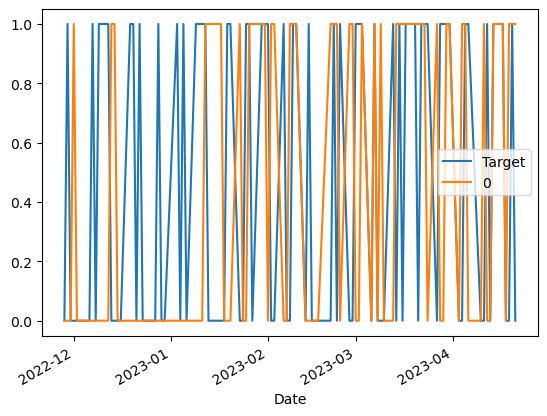

In [156]:
pred_ser = pd.Series(preds, index = test.index)
comb = pd.concat([test['Target'], pred_ser], axis=1)
comb.plot()

> Plotting the predictions over the true values, it is clear that the model went in the wrong direction most times

To increase the accuracy of the model and be more certain it will perform well in real world cases, we'll need to backtest it using more historical data

### Building a Backtesting System

This systems checks large hstorical data for 250 trading days per test to evaluate the performance of the model

In [157]:
# define a function to make predictions 

def predict(train, test, predictors, model):
    '''a function to make and store predictions to a dataframe'''
    X_train = np.asanyarray(train[predictors])
    y_train = np.asanyarray(train.Target)
    X_test = np.asanyarray(test[predictors])
    y_test = test.Target
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions = pd.Series(predictions, index = test.index , name='Prediction')
    comb = pd.concat([y_test, predictions], axis=1)
    return comb
    
# define the backtest function that trains using 2500 datapoints (about 10 years of trading), 
# and makes predictions on 250 future test set
# then train by incrementing the previous training set by a set of 250 

def backtest(data, predictors, start=2500, step=250):
    '''a function to repeatedly test the model\s performance using yearly historical daily trade data'''
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i]
        test = data.iloc[i:(i+step)]
        preds = predict(train, test, predictors, model)
        all_preds.append(preds)
    return pd.concat(all_preds)

In [158]:
# call the backtest function to obtain a large series of predictions
backtest_preds = backtest(sp500, predictors)

In [160]:
# preview the predictions from backtesting
print(backtest_preds.shape)
backtest_preds.head()

(5891, 2)


,Target,Prediction
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0


In [163]:
# obtain the precision of the model

print(precision_score(backtest_preds.Target, backtest_preds.Prediction))

0.523390643742503


In [164]:
# how many times the model predicted up and down

backtest_preds.Prediction.value_counts()

0    3390
1    2501
Name: Prediction, dtype: int64

In [165]:
# how many percent of uptrends actually occurred in the data

(sp500.Target.value_counts()/sp500.Target.shape[0])*100

1    53.42629
0    46.57371
Name: Target, dtype: float64

#### From the above, it's evident that the model performed worse at predicting the number of uptrends.

### Next Steps: Add New Predictors

> Add additional __predictors__ to improve the model

First, add some columns to compare the moving averages of the index's closing price over previous time periods and the current dates

In [166]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [168]:
# specify what time periods to compare
horizons = [2,5,60,250,1000]

new_predictors = []

# iterate through the time periods and perform the rolling operations 
for horizon in horizons:
    
    # create rolling averages and store the 'result' as a column in the sp500 df
    # the 'result' will be a ratio comparison between the trading day's closing price and the rolling average for the Close column

    rolling_average = sp500.rolling(window=horizon).mean()
    ratio_column = f"Closing_ratio_{horizon}"
    sp500[ratio_column] = sp500.Close / rolling_average.Close
    
    # create a trend column recording how many days there was an uptrend
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target'] # we shift the df since monitoring the trend must rely on past data excluding the current day (ie. data of a day that hasn't ended - we are not certain if the market will close up or down)
    
    # add each new predictor name above to the new_predictors list
    new_predictors += [ratio_column, trend_column]

In [169]:
sp500.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target,Closing_ratio_2,Trend_2,Closing_ratio_5,Trend_5,Closing_ratio_60,Trend_60,Closing_ratio_250,Trend_250,Closing_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-09 00:00:00-05:00,353.829987,354.170013,349.609985,349.619995,155210000,347.309998,0,0.994072,1.0,0.987605,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-10 00:00:00-05:00,349.619995,349.619995,344.320007,347.309998,175990000,348.529999,1,0.996685,0.0,0.987467,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-11 00:00:00-05:00,347.309998,350.140015,347.309998,348.529999,154390000,339.929993,0,1.001753,1.0,0.994976,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-12 00:00:00-05:00,348.529999,348.529999,339.489990,339.929993,183880000,337.000000,0,0.987508,1.0,0.977271,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# there are many null values, so we'll drop those rows

sp500.dropna(inplace =True)
sp500.isna().sum().sum() #check for any null rows

0

### Improve the model

We'll improve the model by changing some of the parameters.
> The n_estimators parameter will be increased so the model uses more decision trees to make predictions

> The min_sample_split will be reduced so the model can drill down the clasification more



In [171]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

#### Improve the prediction function 

Currently, the prediction function gives values of either 0 or 1 indicating an uptrend or the reverse

However, it would be more reliable to predict the probability that an uptrend will occur

In [178]:
# redefine the predict function with new edits

def predict(train, test, predictors, model):
    '''a function to make and store predictions to a dataframe'''
    X_train = np.asanyarray(train[predictors])
    y_train = np.asanyarray(train.Target)
    X_test = np.asanyarray(test[predictors])
    y_test = test.Target
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:,1]
    predictions[predictions >= 0.6] = 1
    predictions[predictions < 0.6] = 0
    predictions = pd.Series(predictions, index = test.index , name='Prediction')
    comb = pd.concat([y_test, predictions], axis=1)
    return comb

In [179]:
# backtest the model and its predictions
predictions = backtest(sp500, new_predictors) # the new predictors are better for modelling 
# since they reflect the progression of the index performance 
# and not the absolute values from the earlier predictors that don't necessary inmpact pice action

In [180]:
predictions.head()

,Target,Prediction
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0


In [181]:
# obtain the precision score of the predictions made

print(precision_score(predictions.Target, predictions.Prediction))

0.5694956949569495


> This precision score is higher than that obatained earlier, indicating an increase in the reliability and accuracy of the model

In [183]:
print(classification_report(predictions.Target, predictions.Prediction))

              precision    recall  f1-score   support

           0       0.46      0.84      0.60      2230
           1       0.57      0.17      0.27      2660

    accuracy                           0.48      4890
   macro avg       0.52      0.51      0.43      4890
weighted avg       0.52      0.48      0.42      4890



### Conclusion

> The model performs better than earlier and would have been profitable if followed

It can however still be improved using new parameters like tracking specific components of the index. Or factoring the impact of other Stock Exchange Markets around the world on the index

News, interest rates, inflation, and macro economic metrics can also be added to increase its accuracy

- This project is a __research__ effort into the applications of Machine Learning algorithms for real world problems

Credits: [Dataquest](https://youtu.be/1O_BenficgE)